# RLC Circuit Simulator
By: Michael Remley and Shashank Swaminathan

Simulates the effect of an inductor in series with a capacitor and resistor in parallel on a rectified waveform input.

In [23]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from scipy import signal

In [24]:
def make_system(params,t_0,t_end, supply_func):
    """Make a system object for the RLEV model.
    
    params(R, L, C): Circuit component values
    
    t_0: Beginning time in seconds
    t_end: Ending time in seconds
    
    returns: System object
    """
    # Start with initial zero conditions
    init = State(Vout=0,dVoutdt=0)
    
    #Get our input waveform function
    Vin = supply_func
    
    #Get our parameters
    R,L,C = params    

    return System(R=R, L=L, C=C, Vin = Vin,
                  t_0=t_0, t_end=t_end, init=init)

In [25]:
def sine_wave(frequency = 1, A_rms = 1):
    """
    Return a sine wave with passed frequency (Hz) and amplitude (Volts)
        t: Single value representing time, or array of time steps
        A: Amplitude default 1
    Returns:
        The function of a sine wave with the given parameters
    """
    def v_sine(t, omega = 2 * pi * frequency, A = A_rms * sqrt(2), ):
        return A * np.sin(omega * t)
    
    return v_sine

def square_wave(frequency = 1, A_rms = 1):
    """
    Return a square wave with passed frequency (Hz) and amplitude (Volts)
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_square(t, omega = 2 * pi * frequency, A = A_rms * 1):
        return A * signal.square(omega * t)
    
    return v_square

def sawtooth_wave(frequency = 1, A_rms=1):
    """
    Return a sawtooth wave with passed frequency (Hz) and amplitude (Volts)
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_square(t, omega = 2 * pi * frequency, A = A_rms * sqrt(3)):
        return A * signal.sawtooth(omega * t)
    
    return v_square

def triangle_wave(frequency = 1, A_rms=1):
    """
    Return a triangle wave with passed frequency (Hz) and amplitude (Volts)
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_triangle(t, omega = 2*pi*frequency, A = A_rms * sqrt(3)):
        return A * signal.sawtooth(omega * t,0.5)
    
    return v_triangle

In [26]:
def slope_func(state, t, system):
    """Calculate the slopes.
    
    state: State (Vout, dVoutdt)
    t: time
    system: System object
    
    returns: State (dVoutdt, d2Voutdt2)
    """
    #Get local variables
    Vout, dVoutdt = state
    unpack(system)
    
    #Calculate slopes according to our equations
    d2Voutdt2 = 1/(L*C) * (abs(Vin(t)) - (L/R)*dVoutdt - Vout)
    dVoutdt = (R/L) * (abs(Vin(t)) - (L*C)*d2Voutdt2 - Vout)
    
    return dVoutdt, d2Voutdt2

In [34]:
def run_simulation(input_waveform):
    # Set paramters
    params = Params(R=1,L=1,C=1)
    result = TimeSeries()
    
    # Make the system
    system = make_system(params,0,20,input_waveform)

    # Run the simulation and display the time taken and success
    results, details = run_ode_solver(system,slope_func,max_step=1e-4);
    result = results.Vout
    return result

In [35]:
input_waveforms = [
    sine_wave(60,120),
    square_wave(60,120),
    sawtooth_wave(60,120),
    triangle_wave(60,120),
]
%time results1 = run_simulation(input_waveforms[0])
print("25%")
%time results2 = run_simulation(input_waveforms[1])
print("50%")
%time results3 = run_simulation(input_waveforms[2])
print("75%")
%time results4 = run_simulation(input_waveforms[3]);

Wall time: 2min 43s
25%
Wall time: 4min 18s
50%
Wall time: 5min 25s
75%
Wall time: 4min 14s


NameError: name 'grid' is not defined

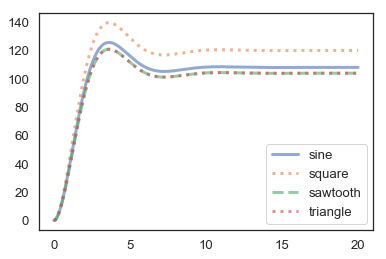

In [37]:
plot(results1,'-',label='sine')
plot(results2, ':',label='square')
plot(results3,'--',label='sawtooth')
plot(results4,':',label='triangle')
legend()


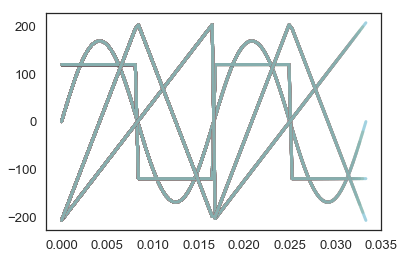

In [50]:
ts = linspace(0,1/30,100)

for w in input_waveforms:
    result = TimeSeries()
    for t in ts:
        result[t] = w(t)
        plot(result)
